In [ ]:
import os
os.umask(7)

# Download public data

In [ ]:
from pathlib import Path
from steproids.data import get_challenge_data

In [ ]:
url_starting_kit = "https://codalab.lisn.upsaclay.fr/my/datasets/download/338ee871-3adf-401b-add8-abe82579c58b"
url_public_data = "https://codalab.lisn.upsaclay.fr/my/datasets/download/2a1336c5-552b-4155-b30e-fc4d2a3cc688"

In [ ]:
data_path = Path("/data")  # Whatever path suits your needs
data_path.exists()

True

In [ ]:
get_challenge_data(url_starting_kit, data_path/"starting_kit")

In [ ]:
get_challenge_data(url_public_data, data_path/"public_data")

# Extract the dataset properties

In [ ]:
from steproids.data import dataset_statistics

In [ ]:
path_ds = data_path/"starting_kit"
stats = dataset_statistics(path_ds)

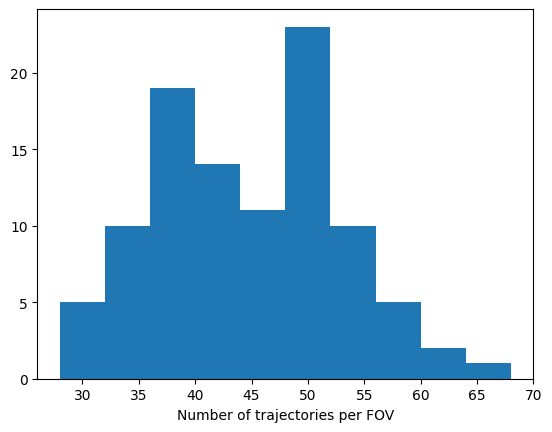

In [ ]:
import matplotlib.pyplot as plt

plt.hist(stats["trajs_per_fov"])
plt.xlabel("Number of trajectories per FOV");

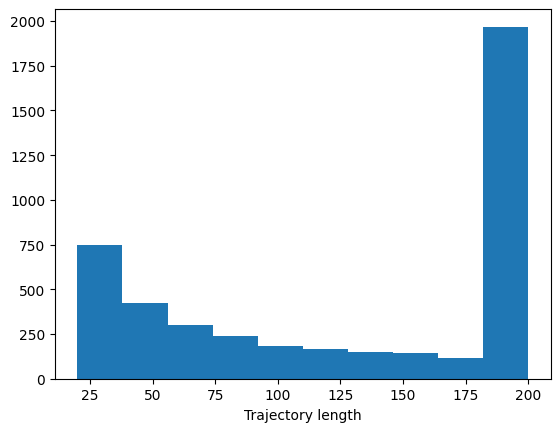

In [ ]:
plt.hist([t for tls in stats["traj_lengths"] for t in tls])
plt.xlabel("Trajectory length");

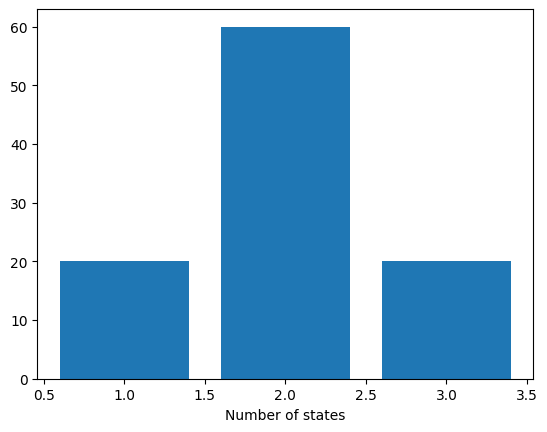

In [ ]:
n_states, counts = np.unique(stats["states_per_fov"], return_counts=True)
plt.bar(n_states, counts)
plt.xlabel("Number of states");

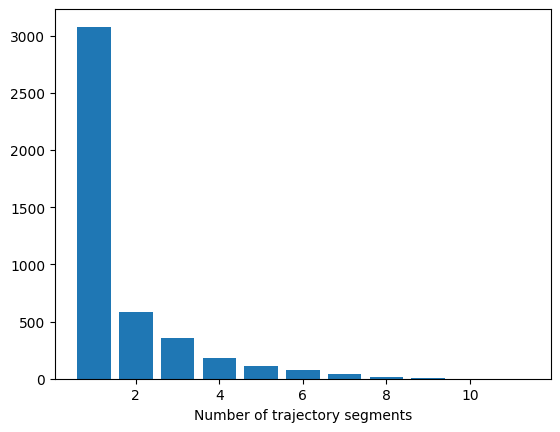

In [ ]:
n_traj_segments = [len(traj_cps) for fov_cps in stats["cps"] for traj_cps in fov_cps]
n_segments, counts = np.unique(n_traj_segments, return_counts=True)

plt.bar(n_segments, counts)
plt.xlabel("Number of trajectory segments");

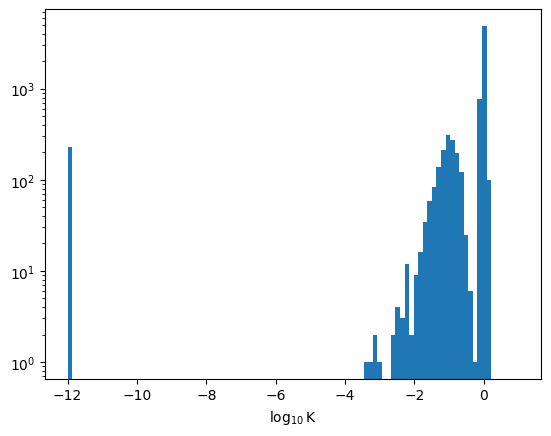

In [ ]:
ks = [np.log10(k) if k > 0 else -12 for fov_ks in stats["ks"] for traj_ks in fov_ks for k in traj_ks]

plt.hist(ks, bins=(np.linspace(-12, 1, 100)))
plt.yscale("log")
plt.xlabel(r"$\log_{10}$K");

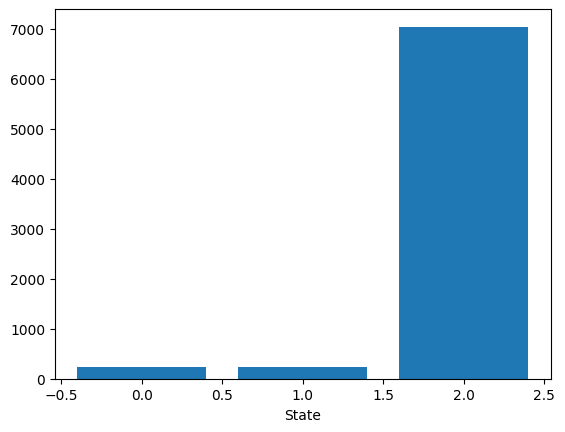

In [ ]:
states = [s for fov_states in stats["states"] for traj_states in fov_states for s in traj_states]

unique_states, counts = np.unique(states, return_counts=True)

plt.bar(unique_states, counts)
plt.xlabel("State");